In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply

In [ ]:
import os

dataset = pd.read_csv('house_prices.csv')


X = dataset.drop(columns=["Amount(in rupees)", "Price (in rupees)"])


y = dataset["Price (in rupees)"]


cols_to_drop = ['Dimensions', 'Plot Area', 'Super Area']
X = X.drop(columns=cols_to_drop)

print("X VALUES (first 5 rows): \n\n\n",X)
print("Y VALUES (first 5 rows): \n",y)

X VALUES (first 5 rows): 


       Index                                              Title  \
0         0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1         1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2         2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3         3        1 BHK Ready to Occupy Flat for sale Kasheli   
4         4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...     ...                                                ...   
9994   9994         2 BHK Ready to Occupy Flat for sale Tragad   
9995   9995  2 BHK Ready to Occupy Flat for sale in Sambhav...   
9996   9996  3 BHK Ready to Occupy Flat for sale Chimanlal ...   
9997   9997  4 BHK Ready to Occupy Flat for sale in Swati P...   
9998   9998  2 BHK Ready to Occupy Flat for sale in Radhi R...   

                                            Description   location  \
0     Bhiwandi, Thane has an attractive 1 BHK Flat f...      thane   
1     One can find this stunning 2 BHK

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Confirm that X is a DataFrame
print("Type of X:", type(X))


categorical_cols = ['location', 'Status', 'Floor', 'Transaction', 'Furnishing',
                    'facing', 'overlooking', 'Society', 'Ownership', 'Balcony', 'Car Parking']

numeric_cols = X.select_dtypes(include=np.number).columns.tolist()


ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough_numeric', 'passthrough', numeric_cols)
    ],
    remainder='drop'  
)

X_encoded = ct.fit_transform(X)



print(X_encoded)
print(y)

Type of X: <class 'pandas.core.frame.DataFrame'>
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 119987 stored elements and shape (9999, 2719)>
  Coords	Values
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 35)	1.0
  (0, 650)	1.0
  (0, 654)	1.0
  (0, 664)	1.0
  (0, 678)	1.0
  (0, 2352)	1.0
  (0, 2661)	1.0
  (0, 2664)	1.0
  (0, 2717)	1.0
  (1, 4)	1.0
  (1, 5)	1.0
  (1, 392)	1.0
  (1, 650)	1.0
  (1, 653)	1.0
  (1, 656)	1.0
  (1, 665)	1.0
  (1, 1043)	1.0
  (1, 2658)	1.0
  (1, 2671)	1.0
  (1, 2674)	1.0
  (1, 2718)	1.0
  (2, 4)	1.0
  (2, 5)	1.0
  :	:
  (9996, 2718)	9996.0
  (9997, 0)	1.0
  (9997, 5)	1.0
  (9997, 537)	1.0
  (9997, 647)	1.0
  (9997, 654)	1.0
  (9997, 656)	1.0
  (9997, 672)	1.0
  (9997, 2446)	1.0
  (9997, 2658)	1.0
  (9997, 2662)	1.0
  (9997, 2686)	1.0
  (9997, 2718)	9997.0
  (9998, 0)	1.0
  (9998, 5)	1.0
  (9998, 28)	1.0
  (9998, 650)	1.0
  (9998, 653)	1.0
  (9998, 656)	1.0
  (9998, 665)	1.0
  (9998, 1837)	1.0
  (9998, 2658)	1.0
  (9998, 2664)	1.0
  (9998, 2717)	1.0
  (9998, 2

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

numeric_cols_X = X.select_dtypes(include=np.number).columns.tolist()

known_categorical_cols_X = ['location', 'Status', 'Floor', 'Transaction', 'Furnishing',
                          'facing', 'overlooking', 'Society', 'Ownership', 'Dimensions',
                          'Carpet Area', 'Balcony', 'Car Parking']
categorical_cols_X = [col for col in known_categorical_cols_X if col in X.columns]

numeric_imputer_X = SimpleImputer(strategy='mean')
categorical_imputer_X = SimpleImputer(strategy='most_frequent')


preprocessor_X = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer_X, numeric_cols_X),
        ('cat', categorical_imputer_X, categorical_cols_X)
    ],
    remainder='drop' 
)


X_imputed = preprocessor_X.fit_transform(X)


y = y.fillna(y.mean())

numeric_imputer_y = SimpleImputer(strategy='mean')

y_imputed = numeric_imputer_y.fit_transform(y.values.reshape(-1,1)).ravel()


y_imputed = pd.DataFrame(y_imputed, columns=numeric_cols_y, index=y.index)


print("Shape of X after imputation:", X_imputed.shape)
print("First 5 rows of X after imputation:\n", X_imputed[:5])
print("\nShape of y after imputation:", y_imputed.shape)
print("First 5 rows of y after imputation:\n", y_imputed.head())

Shape of X after imputation: (9999, 13)
First 5 rows of X after imputation:
 [[0.0 'thane' 'Ready to Move' '10 out of 11' 'Resale' 'Unfurnished'
  'East' 'Main Road' 'Srushti Siddhi Mangal Murti Complex' 'Freehold'
  '500 sqft' '2' '1 Covered']
 [1.0 'thane' 'Ready to Move' '3 out of 22' 'Resale' 'Semi-Furnished'
  'East' 'Garden/Park' 'Dosti Vihar' 'Freehold' '473 sqft' '1' '1 Open']
 [2.0 'thane' 'Ready to Move' '10 out of 29' 'Resale' 'Unfurnished'
  'East' 'Garden/Park' 'Sunrise by Kalpataru' 'Freehold' '779 sqft' '1'
  '1 Covered']
 [3.0 'thane' 'Ready to Move' '1 out of 3' 'Resale' 'Unfurnished' 'East'
  'Main Road' 'Nebula Tower' 'Freehold' '530 sqft' '1' '1 Covered']
 [4.0 'thane' 'Ready to Move' '20 out of 42' 'Resale' 'Unfurnished'
  'West' 'Garden/Park, Main Road' 'TenX Habitat Raymond Realty'
  'Co-operative Society' '635 sqft' '1' '1 Covered']]

Shape of y after imputation: (9999, 1)
First 5 rows of y after imputation:
    Price (in rupees)
0        6000.000000
1       137

In [299]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numeric_cols)
    ],
    remainder='drop'
)

X_encoded = ct.fit_transform(X)

print(X_encoded)



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 119987 stored elements and shape (9999, 2719)>
  Coords	Values
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 35)	1.0
  (0, 650)	1.0
  (0, 654)	1.0
  (0, 664)	1.0
  (0, 678)	1.0
  (0, 2352)	1.0
  (0, 2661)	1.0
  (0, 2664)	1.0
  (0, 2717)	1.0
  (1, 4)	1.0
  (1, 5)	1.0
  (1, 392)	1.0
  (1, 650)	1.0
  (1, 653)	1.0
  (1, 656)	1.0
  (1, 665)	1.0
  (1, 1043)	1.0
  (1, 2658)	1.0
  (1, 2671)	1.0
  (1, 2674)	1.0
  (1, 2718)	1.0
  (2, 4)	1.0
  (2, 5)	1.0
  :	:
  (9996, 2718)	9996.0
  (9997, 0)	1.0
  (9997, 5)	1.0
  (9997, 537)	1.0
  (9997, 647)	1.0
  (9997, 654)	1.0
  (9997, 656)	1.0
  (9997, 672)	1.0
  (9997, 2446)	1.0
  (9997, 2658)	1.0
  (9997, 2662)	1.0
  (9997, 2686)	1.0
  (9997, 2718)	9997.0
  (9998, 0)	1.0
  (9998, 5)	1.0
  (9998, 28)	1.0
  (9998, 650)	1.0
  (9998, 653)	1.0
  (9998, 656)	1.0
  (9998, 665)	1.0
  (9998, 1837)	1.0
  (9998, 2658)	1.0
  (9998, 2664)	1.0
  (9998, 2717)	1.0
  (9998, 2718)	9998.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
known_categorical_cols = ['location', 'Status', 'Floor', 'Transaction', 'Furnishing',
                          'facing', 'overlooking', 'Society', 'Ownership', 'Dimensions',
                          'Carpet Area', 'Balcony', 'Car Parking']
categorical_cols = [col for col in known_categorical_cols if col in X.columns]

# Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)

X_processed = preprocessor.fit_transform(X)


from sklearn.impute import SimpleImputer
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1,1)).ravel()


X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_imputed, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7999, 3792)
X_test shape: (2000, 3792)
y_train shape: (7999,)
y_test shape: (2000,)


SIMPLE LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train.ravel())

LinearRegression()

DECISION TREE REGRESSION MODEL

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_decision = DecisionTreeRegressor(random_state=42)
regressor_decision.fit(X_train, y_train.ravel()) 

DecisionTreeRegressor(random_state=42)

RANDOM FOREST REGRESSION MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random = RandomForestRegressor(random_state=42)
regressor_random.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

SIMPLE LINEAR REGRESSION MODEL PREDICTION

In [304]:
s_l_r_m_prediction = regressor_linear.predict(X_test)
print(s_l_r_m_prediction)

[ 4719.49136911  4372.96543414 22170.48438398 ...  5884.95496214
  6879.19564261  3956.19993268]


DECISION TREE REGRESSION MODEL PREDICTION

In [305]:
d_t_r_m_prediction = regressor_decision.predict(X_test)
print(d_t_r_m_prediction)

[ 5000.  3575. 17742. ...  5864. 12308.  4377.]


RANDOM FOREST REGRESSION MODEL PREDICTION

In [306]:
r_f_r_m_prediction = regressor_random.predict(X_test)
print(r_f_r_m_prediction)


[ 5285.55786242  3575.         18493.86683749 ...  5864.
  9822.90051246  4377.        ]


VISUALISING THE TRAINING SET AND TESTING SET IN LINEAR REGRESSION MODEL

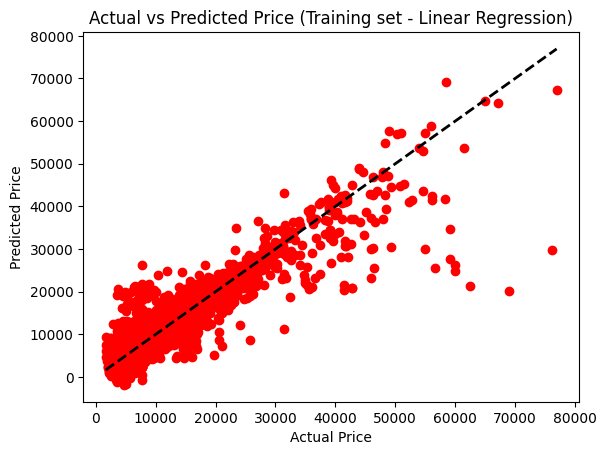

In [ ]:
import matplotlib.pyplot as plt 

y_train_pred_linear = regressor_linear.predict(X_train)

plt.scatter(y_train, y_train_pred_linear, color = 'red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # Optional: Add a diagonal line for perfect prediction

plt.title('Actual vs Predicted Price (Training set - Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

EVALUATING THE SIMPLE LINEAR REGRESSION MODEL PERFORMANCE BY USING R-SQUARE METHOD

In [308]:
from sklearn.metrics import r2_score
r2_score(y_test, s_l_r_m_prediction)

0.5571992459187859

VISUALISING THE TRAINING SET AND TESTING SET IN DECISION TREE REGRESSION MODEL

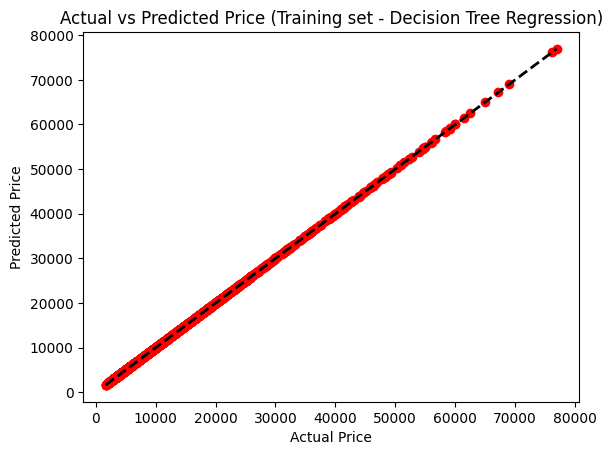

In [ ]:
import matplotlib.pyplot as ply 

y_train_pred_decision = regressor_decision.predict(X_train)

ply.scatter(y_train, y_train_pred_decision, color = 'red')
ply.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
ply.title('Actual vs Predicted Price (Training set - Decision Tree Regression)')
ply.xlabel('Actual Price')
ply.ylabel('Predicted Price')
ply.show()

EVALUATING THE DECISION TREE REGRESSION MODEL PERFORMANACE BY USING R SQUARE

In [310]:
from sklearn.metrics import r2_score
r2_score(y_test, d_t_r_m_prediction)

0.4542060047301205

VISUALISING THE TRAINING SET AND TESTING SET IN RANDOM FOREST REGRESSION MODEL

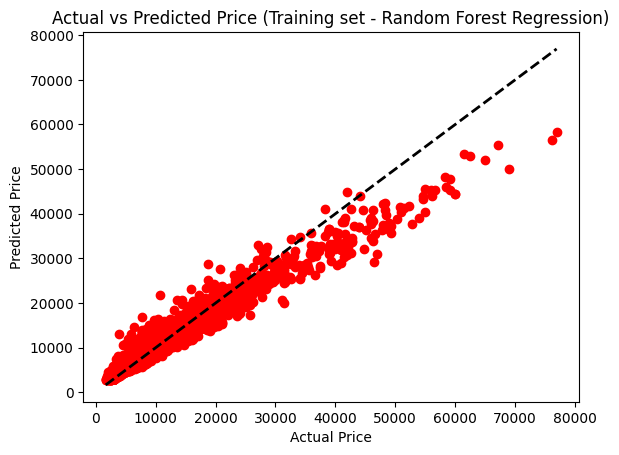

In [ ]:
import matplotlib.pyplot as ply 

y_train_pred_random = regressor_random.predict(X_train)


ply.scatter(y_train, y_train_pred_random, color = 'red')
ply.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
ply.title('Actual vs Predicted Price (Training set - Random Forest Regression)')
ply.xlabel('Actual Price')
ply.ylabel('Predicted Price')
ply.show()

EVALUATING THE RANDOM FOREST REGRESSION MODEL PERFORMANACE BY USING R SQUARE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, s_l_r_m_prediction)))
print("Linear Regression R2:", r2_score(y_test, s_l_r_m_prediction))


print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, d_t_r_m_prediction)))
print("Decision Tree R2:", r2_score(y_test, d_t_r_m_prediction))


print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, r_f_r_m_prediction)))
print("Random Forest R2:", r2_score(y_test, r_f_r_m_prediction))


Linear Regression RMSE: 4535.66548601884
Linear Regression R2: 0.5571992459187859
Decision Tree RMSE: 5035.599917788577
Decision Tree R2: 0.4542060047301205
Random Forest RMSE: 4418.289974145159
Random Forest R2: 0.5798206077677728


X_train shape: (7999, 3793)
X_test shape: (2000, 3793)
y_train shape: (7999,)
y_test shape: (2000,)
--- Linear Regression ---
RMSE: 1.599820557905577e-05
R2 Score: 1.0

--- Decision Tree Regressor ---
RMSE: 195.34875223558507
R2 Score: 0.9991786134239126

--- Random Forest Regressor ---
RMSE: 303.5145974277112
R2 Score: 0.9980171699864835



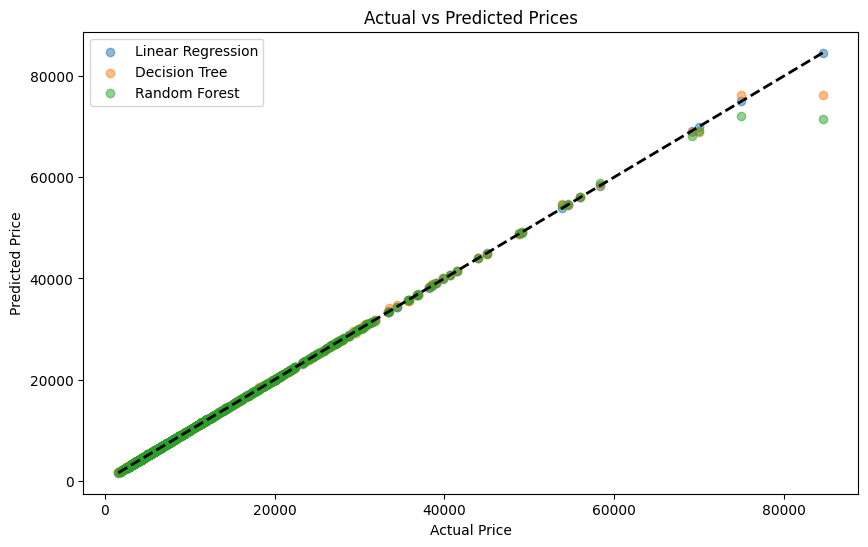

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('house_prices.csv')

y = dataset["Price (in rupees)"]


cols_to_drop = ['Amount(in rupees)', 'Dimensions', 'Plot Area', 'Super Area']
X = dataset.drop(columns=cols_to_drop)


numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
known_categorical_cols = ['location', 'Status', 'Floor', 'Transaction', 'Furnishing',
                          'facing', 'overlooking', 'Society', 'Ownership', 'Carpet Area',
                          'Balcony', 'Car Parking']
categorical_cols = [col for col in known_categorical_cols if col in X.columns]


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)


X_processed = preprocessor.fit_transform(X)


imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1,1)).ravel()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_imputed, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

regressor_decision = DecisionTreeRegressor(random_state=42)
regressor_decision.fit(X_train, y_train)

regressor_random = RandomForestRegressor(random_state=42)
regressor_random.fit(X_train, y_train)


y_pred_lr = regressor_linear.predict(X_test)
y_pred_dtr = regressor_decision.predict(X_test)
y_pred_rfr = regressor_random.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    print(f'--- {name} ---')
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2 Score:', r2_score(y_true, y_pred))
    print()

evaluate_model('Linear Regression', y_test, y_pred_lr)
evaluate_model('Decision Tree Regressor', y_test, y_pred_dtr)
evaluate_model('Random Forest Regressor', y_test, y_pred_rfr)


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_dtr, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, y_pred_rfr, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
